<a href="https://colab.research.google.com/github/anjithsm/DataScience/blob/main/Case_study_on_Unsupervised_Learning_(Wholesale_Customers_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

# Loading the dataset

data = pd.read_csv('/content/Wholesale customers data.csv')

In [35]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [36]:
df = data.copy()

In [37]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [39]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [40]:
df.drop('Channel', axis = 1, inplace = True)

In [41]:
df.isna().sum()

,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


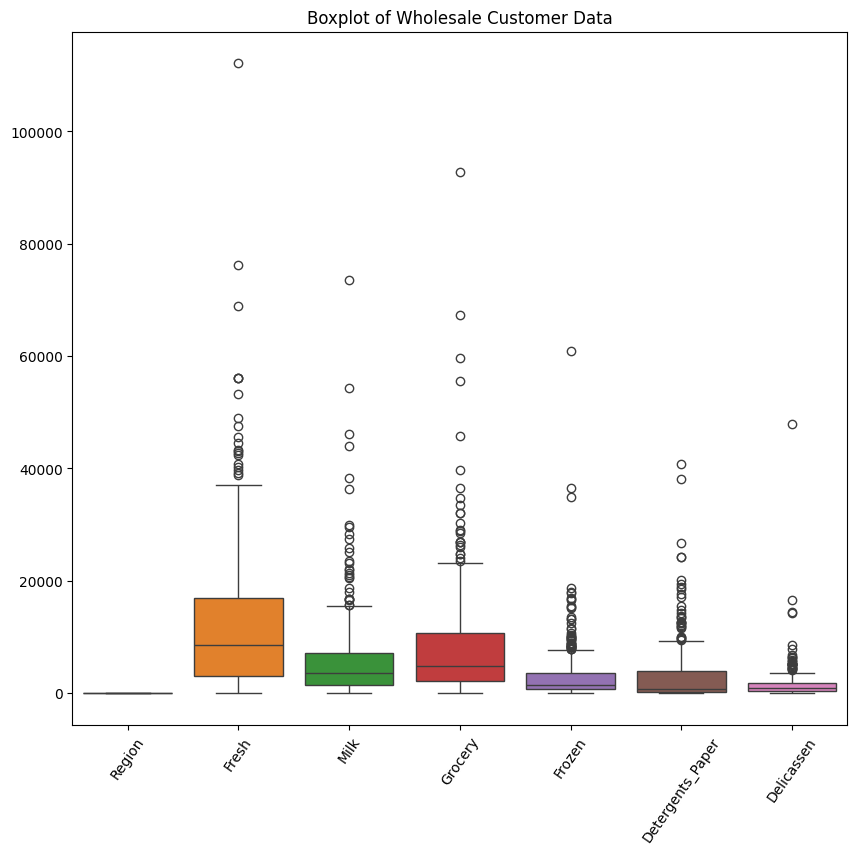

In [42]:
# Boxplot for identifying the outliers

plt.figure(figsize = (10,9))
sns.boxplot(data = df)
plt.xticks(rotation = 55)
plt.title("Boxplot of Wholesale Customer Data")
plt.show()

In [43]:
# Handling outliers

outliers = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
for col in outliers:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR
  df[col] = df[col].clip(lower = lower_limit, upper = upper_limit)

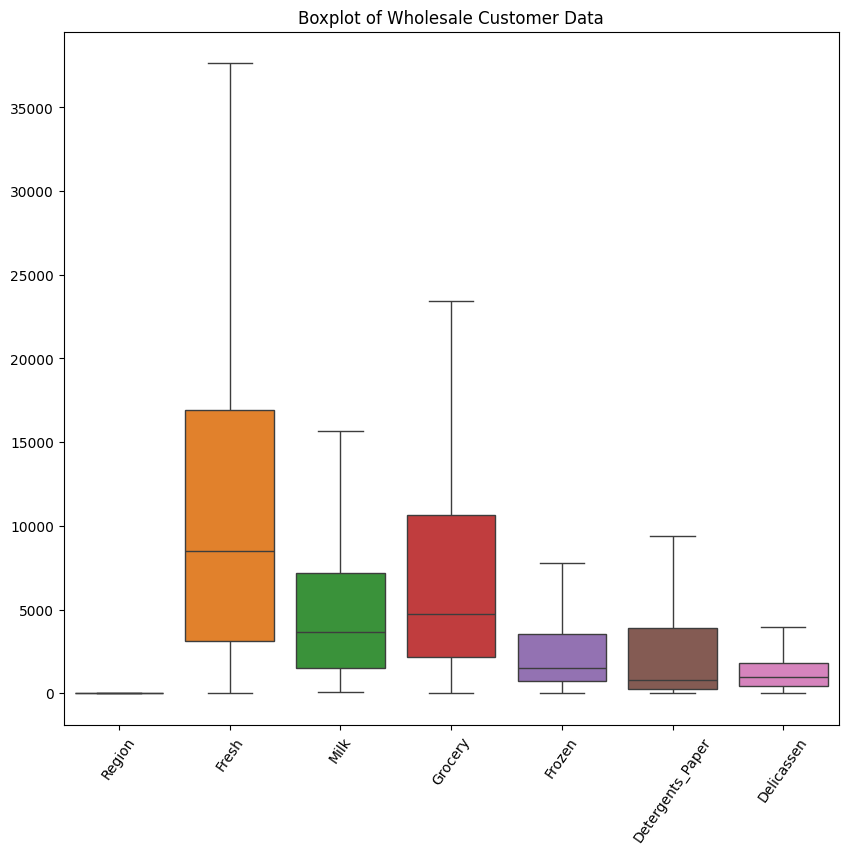

In [44]:
plt.figure(figsize = (10,9))
sns.boxplot(data = df)
plt.xticks(rotation = 55)
plt.title("Boxplot of Wholesale Customer Data")
plt.show()

In [45]:
# Scaling the data

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [46]:
df_scaled

array([[ 0.59066829,  0.12857261,  1.05158597, ..., -0.95324427,
         0.09579175,  0.06589216],
       [ 0.59066829, -0.42162716,  1.08673463, ..., -0.30973493,
         0.30651872,  0.47075856],
       [ 0.59066829, -0.49064723,  0.85804007, ..., -0.04243744,
         0.38243489,  2.46943983],
       ...,
       [ 0.59066829,  0.31112285,  2.38267048, ..., -0.86054235,
         2.39229863,  0.55487464],
       [ 0.59066829, -0.10466425, -0.70014133, ..., -0.61070442,
        -0.75732904,  0.7933576 ],
       [ 0.59066829, -0.84025742, -0.76473271, ..., -1.01518413,
        -0.65213577, -1.1228252 ]])

In [47]:
scaled_df = pd.DataFrame(df_scaled, columns = df.columns)

In [48]:
scaled_df

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.590668,0.128573,1.051586,0.049267,-0.953244,0.095792,0.065892
1,0.590668,-0.421627,1.086735,0.353865,-0.309735,0.306519,0.470759
2,0.590668,-0.490647,0.858040,0.067935,-0.042437,0.382435,2.469440
3,0.590668,0.187004,-0.879308,-0.457635,1.619962,-0.641923,0.481851
4,0.590668,1.103677,0.082487,-0.005824,0.585275,-0.209575,2.469440
...,...,...,...,...,...,...,...
435,0.590668,1.798584,1.598216,1.334130,2.188748,-0.752563,0.866381
436,0.590668,2.576996,-0.825672,-0.982295,0.832619,-0.782861,0.997640
437,0.590668,0.311123,2.382670,2.454609,-0.860542,2.392299,0.554875
438,0.590668,-0.104664,-0.700141,-0.759501,-0.610704,-0.757329,0.793358


In [49]:
# KMeans clustering

kmeans = KMeans(n_clusters = 3, random_state = 42)

In [50]:
kmeans.fit(df_scaled)

KMeans(n_clusters=3, random_state=42)

In [51]:
pred_clusters = kmeans.predict(df_scaled)

In [52]:
pred_clusters

array([2, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0,
       2, 0, 1, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1,
       2, 1, 2, 1, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 0, 2, 0,
       2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 0,
       2, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       0, 1, 0, 1, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,

In [53]:
scaled_df['KMeans_Cluster'] = kmeans.labels_

In [54]:
scaled_df

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMeans_Cluster
0,0.590668,0.128573,1.051586,0.049267,-0.953244,0.095792,0.065892,2
1,0.590668,-0.421627,1.086735,0.353865,-0.309735,0.306519,0.470759,0
2,0.590668,-0.490647,0.858040,0.067935,-0.042437,0.382435,2.469440,1
3,0.590668,0.187004,-0.879308,-0.457635,1.619962,-0.641923,0.481851,1
4,0.590668,1.103677,0.082487,-0.005824,0.585275,-0.209575,2.469440,1
...,...,...,...,...,...,...,...,...
435,0.590668,1.798584,1.598216,1.334130,2.188748,-0.752563,0.866381,1
436,0.590668,2.576996,-0.825672,-0.982295,0.832619,-0.782861,0.997640,1
437,0.590668,0.311123,2.382670,2.454609,-0.860542,2.392299,0.554875,0
438,0.590668,-0.104664,-0.700141,-0.759501,-0.610704,-0.757329,0.793358,2


In [55]:
# Agglomerative Clustering

agg_clustering = AgglomerativeClustering(n_clusters = 3)
scaled_df['Agg_Clustering'] = agg_clustering.fit_predict(scaled_df)

In [56]:
scaled_df

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMeans_Cluster,Agg_Clustering
0,0.590668,0.128573,1.051586,0.049267,-0.953244,0.095792,0.065892,2,0
1,0.590668,-0.421627,1.086735,0.353865,-0.309735,0.306519,0.470759,0,1
2,0.590668,-0.490647,0.858040,0.067935,-0.042437,0.382435,2.469440,1,2
3,0.590668,0.187004,-0.879308,-0.457635,1.619962,-0.641923,0.481851,1,2
4,0.590668,1.103677,0.082487,-0.005824,0.585275,-0.209575,2.469440,1,2
...,...,...,...,...,...,...,...,...,...
435,0.590668,1.798584,1.598216,1.334130,2.188748,-0.752563,0.866381,1,2
436,0.590668,2.576996,-0.825672,-0.982295,0.832619,-0.782861,0.997640,1,2
437,0.590668,0.311123,2.382670,2.454609,-0.860542,2.392299,0.554875,0,1
438,0.590668,-0.104664,-0.700141,-0.759501,-0.610704,-0.757329,0.793358,2,0


## **Visualising K-Means Clustering**

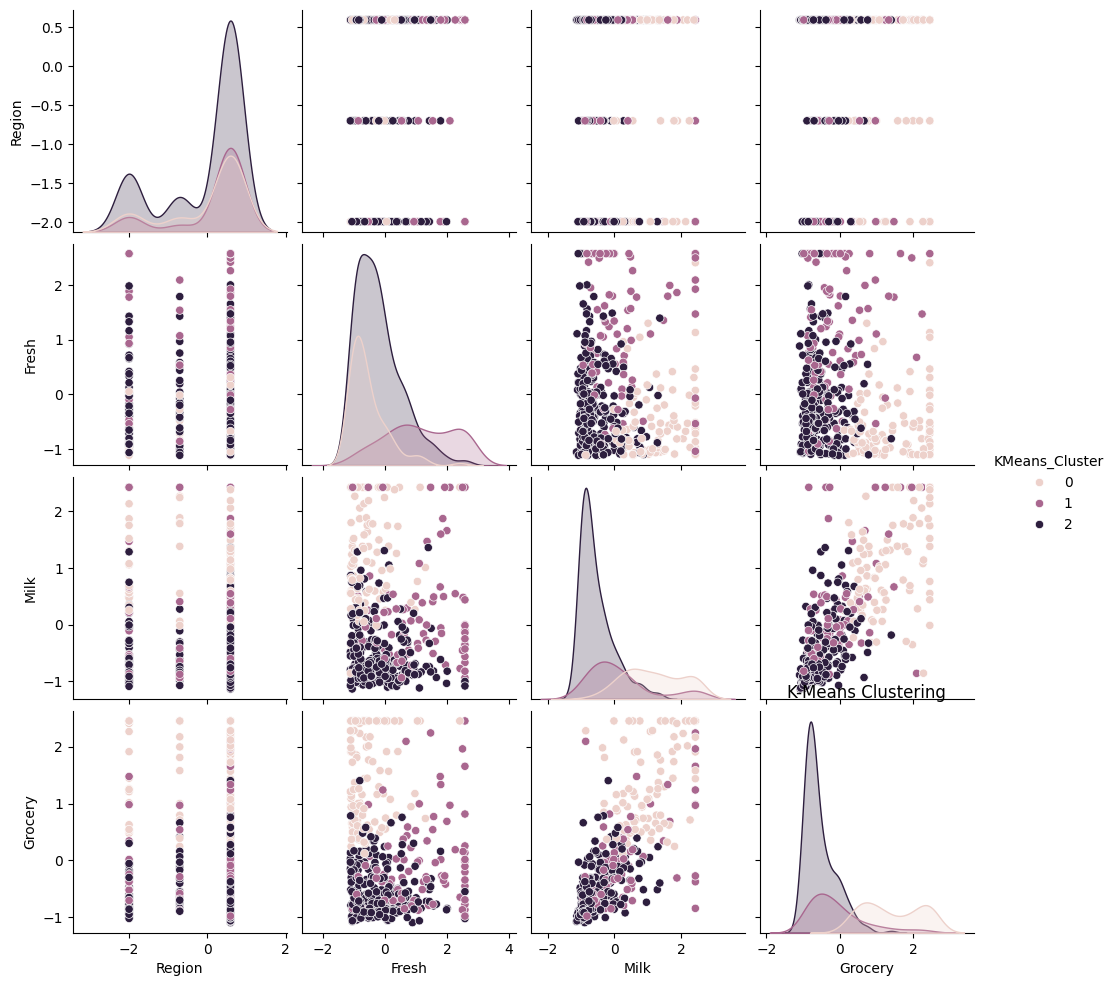

In [59]:
# Visualising the clusters using pairplot

sns.pairplot(scaled_df, hue = 'KMeans_Cluster', vars = ['Region',	'Fresh',	'Milk',	'Grocery'])
plt.title('K-Means Clustering', y = 1.02)
plt.show()

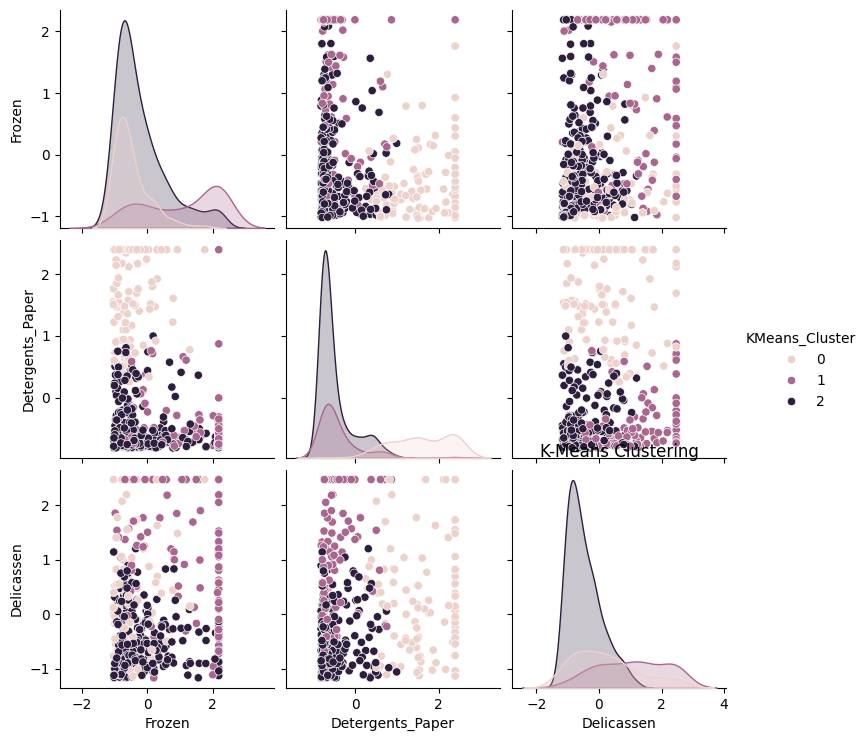

In [61]:
sns.pairplot(scaled_df, hue = 'KMeans_Cluster', vars = ['Frozen',	'Detergents_Paper',	'Delicassen'])
plt.title('K-Means Clustering', y = 1.02)
plt.show()

## **Visualising the Agglomerative Clustering**

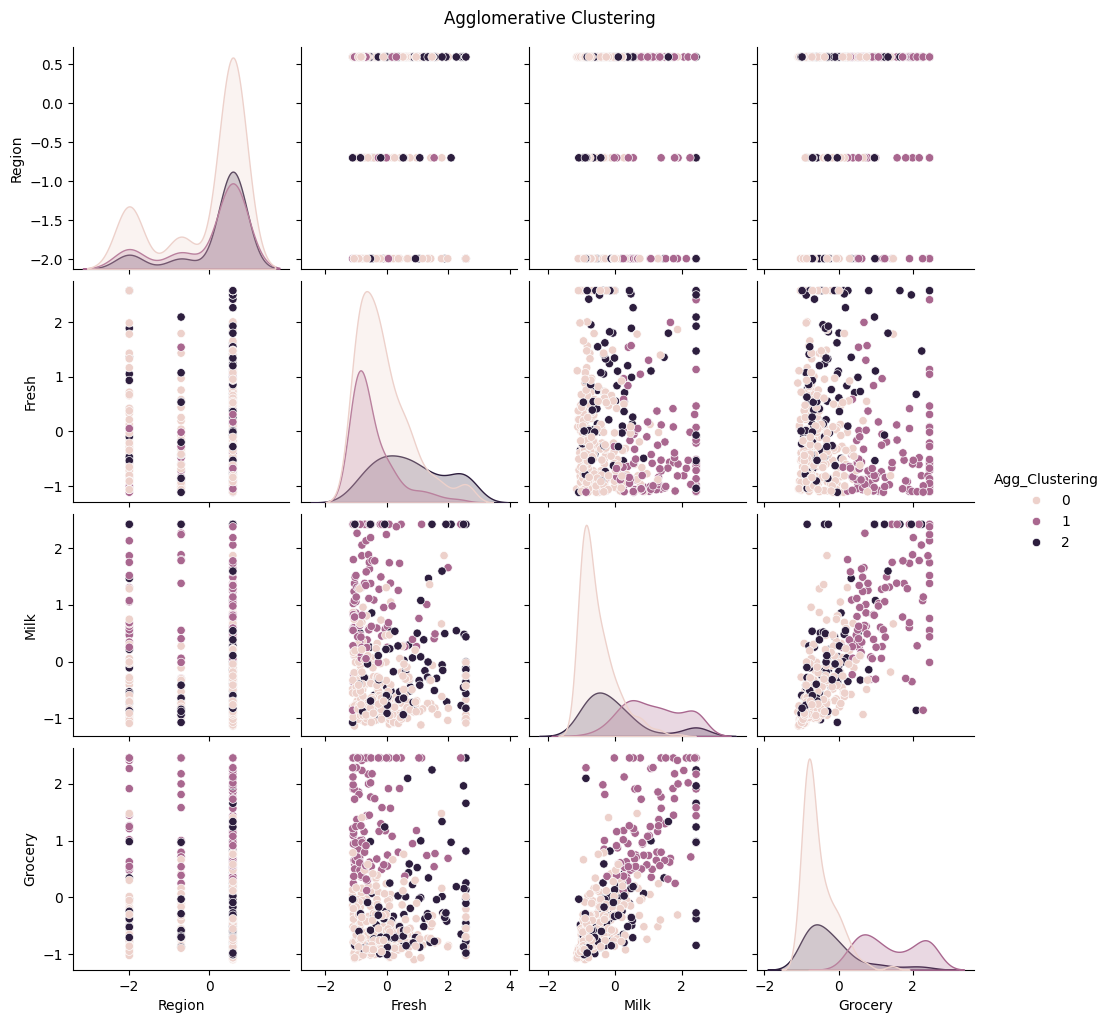

In [64]:
sns.pairplot(scaled_df, hue = 'Agg_Clustering', vars = ['Region',	'Fresh',	'Milk',	'Grocery'])
plt.suptitle('Agglomerative Clustering', y = 1.02)
plt.show()

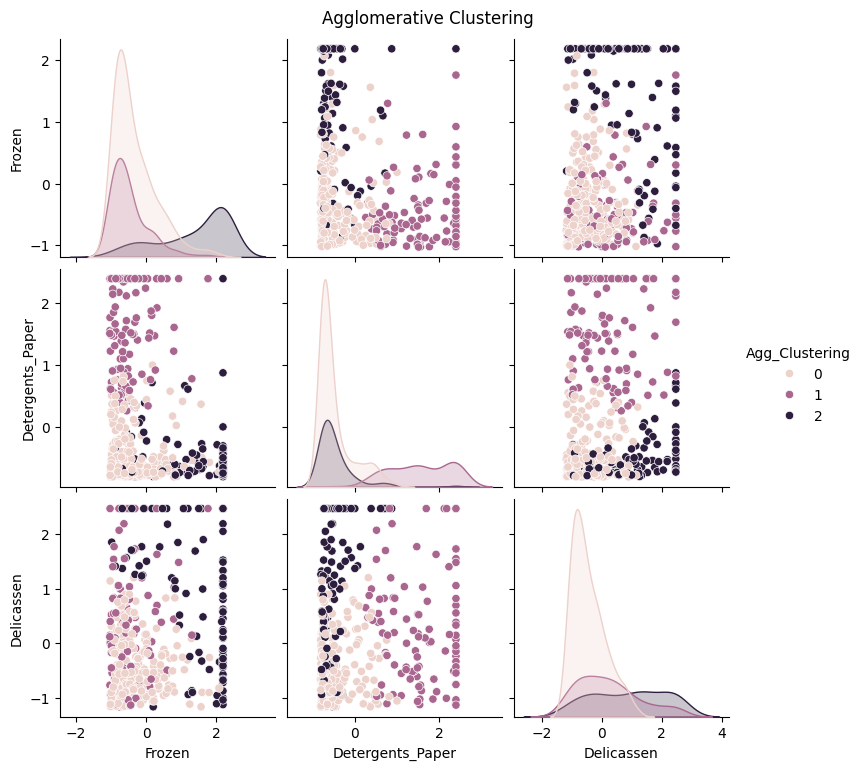

In [63]:
sns.pairplot(scaled_df, hue = 'Agg_Clustering', vars = ['Frozen',	'Detergents_Paper',	'Delicassen'])
plt.suptitle('Agglomerative Clustering', y = 1.02)
plt.show()

In [66]:
scaled_df[['Region',	'Fresh',	'Milk',	'Grocery', 'Frozen', 'Detergents_Paper',	'Delicassen', 'KMeans_Cluster', 'Agg_Clustering']].head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMeans_Cluster,Agg_Clustering
0,0.590668,0.128573,1.051586,0.049267,-0.953244,0.095792,0.065892,2,0
1,0.590668,-0.421627,1.086735,0.353865,-0.309735,0.306519,0.470759,0,1
2,0.590668,-0.490647,0.858040,0.067935,-0.042437,0.382435,2.469440,1,2
3,0.590668,0.187004,-0.879308,-0.457635,1.619962,-0.641923,0.481851,1,2
4,0.590668,1.103677,0.082487,-0.005824,0.585275,-0.209575,2.469440,1,2
